# Task 3: Customer Segmentation / Clustering

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('Customers.csv')
# prducts = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

#### Merging Customers and Transactions

In [3]:
merged_data = transactions.merge(customers, on='CustomerID')

#### Aggregating features for clustering

In [4]:
clustering_features = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'ProductID': 'nunique',
    'TransactionDate': lambda x: (pd.to_datetime(x.max()) - pd.to_datetime(x.min())).days
}).reset_index()

#### Normalize the features

In [5]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features.iloc[:, 1:])

#### Determining the optimal number of clusters(using Elbow Method)

In [6]:
wcss = []
for k in range(2, 11):  # Between 2 and 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

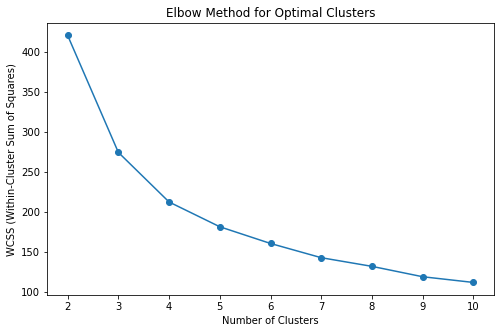

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

#### Applying K-Means clustering with number of clusters

In [8]:
optimal_clusters = 4  # Replace with the elbow/knee point
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clustering_features['Cluster'] = kmeans.fit_predict(scaled_features)

#### Evaluating clustering with Davies-Bouldin Index and Silhouette Score

In [9]:
db_index = davies_bouldin_score(scaled_features, clustering_features['Cluster'])
silhouette_avg = silhouette_score(scaled_features, clustering_features['Cluster'])

print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")

Davies-Bouldin Index: 0.995243565164094
Silhouette Score: 0.3207724576419155


#### Visualizing clusters using PCA

In [10]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
clustering_features['PCA1'] = pca_result[:, 0]
clustering_features['PCA2'] = pca_result[:, 1]

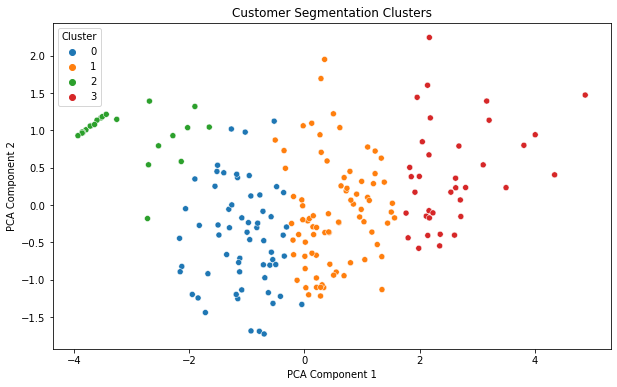

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clustering_features, x='PCA1', y='PCA2', hue='Cluster', palette='tab10')
plt.title('Customer Segmentation Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

#### Saving the clustering results

In [13]:
clustering_features.to_csv('Customer_Segmentation.csv', index=False)
print("Customer_Segmentation.csv has been successfully saved!")

Customer_Segmentation.csv has been successfully saved!


In [14]:
clustering = pd.read_csv('Customer_Segmentation.csv')
print(clustering.describe())
print('\n')
print(clustering.head())

         TotalValue    Quantity   ProductID  TransactionDate     Cluster  \
count    199.000000  199.000000  199.000000       199.000000  199.000000   
mean    3467.314372   12.748744    4.894472       224.447236    1.165829   
std     1832.677958    6.151060    2.113908        91.972580    1.057746   
min       82.360000    1.000000    1.000000         0.000000    0.000000   
25%     2162.040000    8.500000    3.000000       185.500000    0.000000   
50%     3137.660000   12.000000    5.000000       244.000000    1.000000   
75%     4770.225000   17.000000    6.000000       291.000000    2.000000   
max    10673.870000   32.000000   10.000000       360.000000    3.000000   

               PCA1          PCA2  
count  1.990000e+02  1.990000e+02  
mean  -6.471652e-17 -5.579010e-19  
std    1.758316e+00  7.926151e-01  
min   -3.932953e+00 -1.727050e+00  
25%   -1.105482e+00 -5.634270e-01  
50%    2.455155e-02 -9.443136e-02  
75%    1.111554e+00  5.383232e-01  
max    4.875107e+00  2.2440